In [1]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.tsa.stattools as ts
from matplotlib import pyplot as plt
import cointegracao
from scipy.stats import zscore
import seaborn as sns
from itertools import combinations, permutations
from multiprocessing import Pool


In [2]:
bd = pd.read_excel('BD COMPLETO.xlsx')

In [3]:
bd.dropna(axis=0, inplace=True)
bd.set_index('Data', inplace=True)
bd

,ARZZ3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BOVA11,BRAP4,...,SUZB3,TAEE11,TIET11,VVAR3,YDUQ3,NTCO3,ITSA4,BPAC11,BOVV11,dol
Data,,,,,,,,,,,,,,,,,,,,,
2017-04-11,28.5749,22.40,17.4028,28.1720,17.3703,17.6168,21.0011,9.78,62.42,17.2488,...,12.4039,16.4007,10.4669,3.9803,14.2525,14.7845,6.8240,15.8492,64.46,3.531422
2017-04-12,28.5031,22.96,17.3301,27.7085,17.2553,17.4412,20.7890,9.87,61.68,16.2195,...,12.2900,16.5075,10.3283,4.2291,14.5797,14.7213,6.7885,16.1625,64.00,3.519090
2017-04-13,28.7992,22.99,16.8300,26.2664,16.7844,16.9090,20.5403,9.95,60.80,16.3053,...,11.9958,16.2939,10.3822,4.2291,13.9166,14.5948,6.6179,15.5868,62.93,3.536467
2017-04-17,28.6646,22.85,17.7756,27.4853,17.4415,17.6662,21.2791,10.00,62.25,16.5540,...,11.8250,16.3865,10.4515,4.1793,14.7654,15.0277,6.7956,15.5783,64.44,3.483776
2017-04-18,28.2609,23.91,17.9120,27.7514,17.4470,17.5619,21.2060,9.95,61.95,16.1166,...,12.1476,16.5929,10.3052,4.3684,14.6769,14.9061,6.8525,15.2397,64.20,3.492744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-10,56.9600,26.10,56.0000,32.4254,19.3100,20.8500,26.2800,12.93,95.04,43.0300,...,46.3500,28.7300,14.9000,18.0200,27.3100,49.7500,9.4600,79.1300,99.20,5.325000
2020-09-11,55.7500,26.58,56.0200,31.8971,18.8700,20.4600,25.4700,12.93,94.48,44.9000,...,45.6000,28.3800,14.6500,17.9600,27.8900,51.6200,9.2700,78.1100,98.60,5.320500
2020-09-14,57.1700,28.25,58.7300,32.3600,19.1600,20.7000,25.8600,13.27,96.51,44.5500,...,46.1200,28.6000,14.7700,18.3700,30.1100,53.2600,9.3800,81.4800,100.72,5.273000


In [4]:
bd = bd.loc['2018-02-27': '2019-03-02']
bd[['PETR3', 'PETR4']]

,PETR3,PETR4
Data,,
2018-02-27,22.2914,20.0038
2018-02-28,22.3203,19.9665
2018-03-01,21.9540,19.5665
2018-03-02,22.3493,20.0131
2018-03-05,22.9856,20.5806
...,...,...
2019-02-25,29.6930,25.8945
2019-02-26,29.7027,25.7781
2019-02-27,29.8585,26.2630


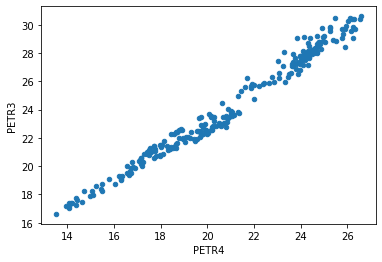

In [5]:
bd[['PETR3', 'PETR4']].plot(kind='scatter', x='PETR4', y='PETR3')

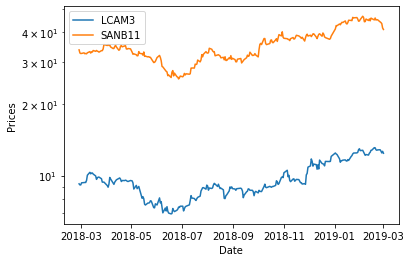

In [6]:
a = sns.lineplot(y='LCAM3', x=bd.index, data=bd, label='LCAM3')
a = sns.lineplot(y='SANB11', x=bd.index, data=bd, label='SANB11')

a.set(yscale='log')

plt.xlabel('Date')
plt.ylabel('Prices')
plt.show()

In [5]:
coint = cointegracao.Cointegration(significance = 0.01, z_score_in=2)

In [8]:
# i_1 = bd.apply(lambda col: coint.adf(col), axis=0)

In [9]:
i_1 = [coint.adf(bd[col]) for col in bd.columns]
i_1 = [ ele for ele in i_1 if ele is not None ]

In [11]:
permut = list(combinations(i_1, 2))[:500]

In [13]:
approved = []
for pair in permut:
    try:
        coint_test = coint.cointegration_test(first_stock=bd[pair[0]], scnd_stock=bd[pair[1]])
        if coint_test:
            approved.append(pair)
    except:
        pass

In [15]:
def cointegrated(pair):
    try:
        coint_test = coint.cointegration_test(first_stock=bd[pair[0]], scnd_stock=bd[pair[1]])
        if coint_test:
            approved.append(pair)
            return pair
    except:
        pass

In [16]:
def executar():
    if __name__ == '__main__':

        with Pool(3) as p:
            results = p.map(cointegrated, permut)

        return results

In [ ]:
results = executar()
print(results)

In [14]:
len(permut)

500

In [20]:
coint.cointegration_test(first_stock=bd['HGTX3'], scnd_stock=bd['LREN3'])

True

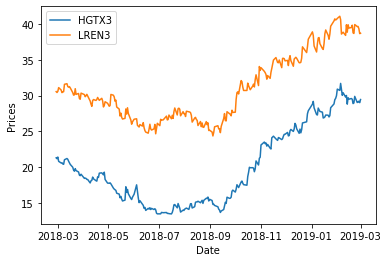

In [21]:
coint.plot_prices()

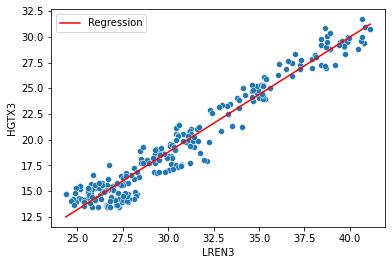

In [22]:
coint.plot_scatter()

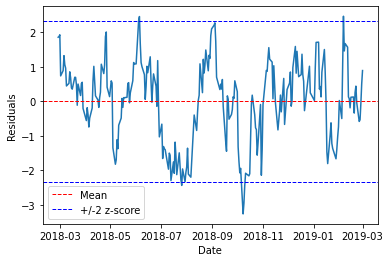

In [23]:
coint.plot_resid_bounds()

In [24]:
ts.adfuller(coint.residuals)

(-4.483219578611228,
 0.00021083394348522685,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 434.2485971347595)

In [18]:
Y = bd['PETR3']
X = bd['PETR4']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
reg = model.fit()

In [13]:
reg.params

const    1.751135
PETR4    1.074009
dtype: float64

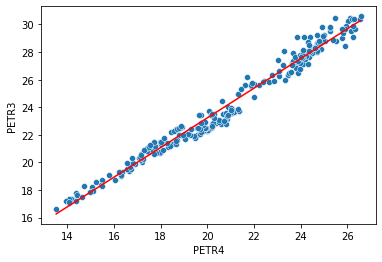

In [14]:
sns.scatterplot(x=bd['PETR4'], y=bd['PETR3'])
sns.lineplot(x=bd['PETR4'], y=reg.fittedvalues, color='red')
plt.show()

In [15]:
bd['PETR4'].name

'PETR4'

In [16]:
resid = reg.resid
resid_mean = resid.mean()
k = 2
upper = resid.std() * k
lower = resid.std() * -k

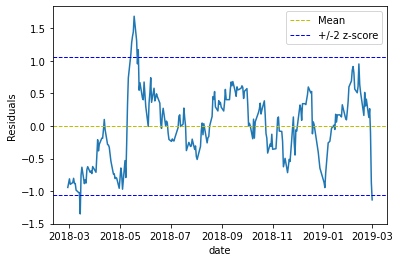

In [17]:
sns.lineplot(y=resid, x=resid.index)

plt.axhline(y=resid_mean, color='y', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=upper,   color='b', linestyle='--', linewidth=1, label=f'+/-{k} z-score')
plt.axhline(y=lower, color='b', linestyle='--', linewidth=1, label='_nolegend_')

plt.xlabel('date')
plt.ylabel('Residuals')

plt.legend()
plt.show()

In [18]:
adf_resid = ts.adfuller(resid)

In [19]:
resid_pvalue = adf_resid[1]
resid_pvalue

0.0028927625394583384

In [20]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PETR3   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Wed, 27 Jul 2022   Prob (F-statistic):          4.95e-210
Time:                        13:37:46   Log-Likelihood:                -197.09
No. Observations:                 250   AIC:                             398.2
Df Residuals:                     248   BIC:                             405.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7511      0.211      8.309      0.000       1.336       2.166
PETR4          1.0740      0.010    107.493      0.000       1.054       1.094
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.260
Skew:                           0.065   Prob(JB):                        0.878
Kurtosis:                       2.909   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
dir(reg)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [3]:
import backtest

In [4]:
res = backtest.executar()